In [2]:
%tensorflow_version 2.x

In [3]:
from google.colab import drive #toimport google drive data

In [5]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enterr the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd /content/drive/"My Drive/"

/content/drive/My Drive


In [7]:
cd "Project Dataset/"

/content/drive/My Drive/Project Dataset


In [8]:
ls

dataset/


In [9]:
#load basic libraries
import pandas as pd
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [10]:
df = pd.read_csv('dataset/Tagrecommendation.csv') #loading csv file

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df.columns

Index(['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'owner_user_id', 'tags',
       'answer_count', 'comment_count', 'favorite_count',
       'community_owned_date', 'title', 'body'],
      dtype='object')

In [12]:
tags=df['tags']

In [ ]:
body=df['body']

In [ ]:
title=df['title']

In [ ]:
title[2]

"How do I calculate someone's age in C#?"

In [ ]:
tags[2]

'<c#><.net><datetime>'

In [ ]:
pip install surprise

     |████████████████████████████████| 11.8 MB 50 kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617811 sha256=53fd96a56915c9d3368b98c7ac60be021f2275928d11409bed6b86fba9d32461
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# Standard Libraries
import pandas as pd
import numpy as np
import json

# Data Preprocessing & NLP
import nltk
import re
import string
import gensim
from textblob import Word

from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
nltk.download('wordnet')
nltk.download('punkt')

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import linear_kernel

# Performance metrics
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Lemmatization process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
lemmatization process. 
'''
lemmatizer = WordNetLemmatizer()
def tokenize_and_lemmatize(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lem

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'owner_user_id', 'tags',
       'answer_count', 'comment_count', 'favorite_count',
       'community_owned_date', 'title', 'body'],
      dtype='object')

In [ ]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=df.drop(labels = ['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'owner_user_id',
       'answer_count', 'comment_count', 'favorite_count',
       'community_owned_date', 'body'], axis=1)

In [ ]:
data_raw = df.iloc[:15000,]
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 15000
Number of columns in data = 2


**Sample data:**


,tags,title
0,<c#><floating-point><type-conversion><double><...,Convert Decimal to Double?
1,<html><css><css3><internet-explorer-7>,Percentage width child element in absolutely p...
2,<c#><.net><datetime>,How do I calculate someone's age in C#?
3,<c#><datetime><time><datediff><relative-time-s...,Calculate relative time in C#
4,<javascript><html><browser><timezone><timezone...,Determine a User's Timezone


In [ ]:
for i in range(len(data_raw)):
  tags=[]
  tg=data_raw['tags'][i].split('>')
  for k in range(len(tg)-1):
    tags.append(tg[k].replace('<',''))
  data_raw['tags'][i]=tags

In [ ]:
data_raw

,tags,title
0,"[c#, floating-point, type-conversion, double, ...",Convert Decimal to Double?
1,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?
3,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#
4,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone
...,...,...
14995,"[ms-access, ms-access-2007]",Insert SQL command with Datetime in MS-Access
14996,"[sql, stored-procedures, function, plsql]",What is the difference between function and pr...
14997,"[browser, printing, webpage]",link to Print in a webpage
14998,"[c#, visual-studio, visual-c++]",Using c++ library in c#


In [ ]:
# Data Cleaning & Preprocessing techniques
def clean_text(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [ ]:
import re
# creating clean text feature
features = ['title']
for feature in features:
    data_raw['clean_' + feature] = data_raw[feature].apply(clean_text)

In [ ]:
data_raw

,tags,title,clean_title
0,"[c#, floating-point, type-conversion, double, ...",Convert Decimal to Double?,convert decimal to double
1,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...,percentage width child element in absolutely p...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?,how do i calculate someone s age in c
3,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#,calculate relative time in c
4,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone,determine a user s timezone
...,...,...,...
14995,"[ms-access, ms-access-2007]",Insert SQL command with Datetime in MS-Access,insert sql command with datetime in ms access
14996,"[sql, stored-procedures, function, plsql]",What is the difference between function and pr...,what is the difference between function and pr...
14997,"[browser, printing, webpage]",link to Print in a webpage,link to print in a webpage
14998,"[c#, visual-studio, visual-c++]",Using c++ library in c#,using c library in c


In [ ]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 55.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    freq_dist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'count':list(freq_dist.values())})
    
    fig = plt.figure(figsize=(21,16))
    ax1 = fig.add_subplot(2,1,1)
    wordcloud = WordCloud(width=1000, height=300, background_color='black', 
                          max_words=1628, relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False).generate_from_frequencies(freq_dist)
    
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    
    # select top 20 most frequent word
    ax2 = fig.add_subplot(2,1,2)
    d = words_df.nlargest(columns="count", n = terms) 
    ax2 = sns.barplot(data=d, palette = sns.color_palette('BuGn_r'), x= "count", y = "word")
    ax2.set(ylabel= 'Word')
    plt.show()

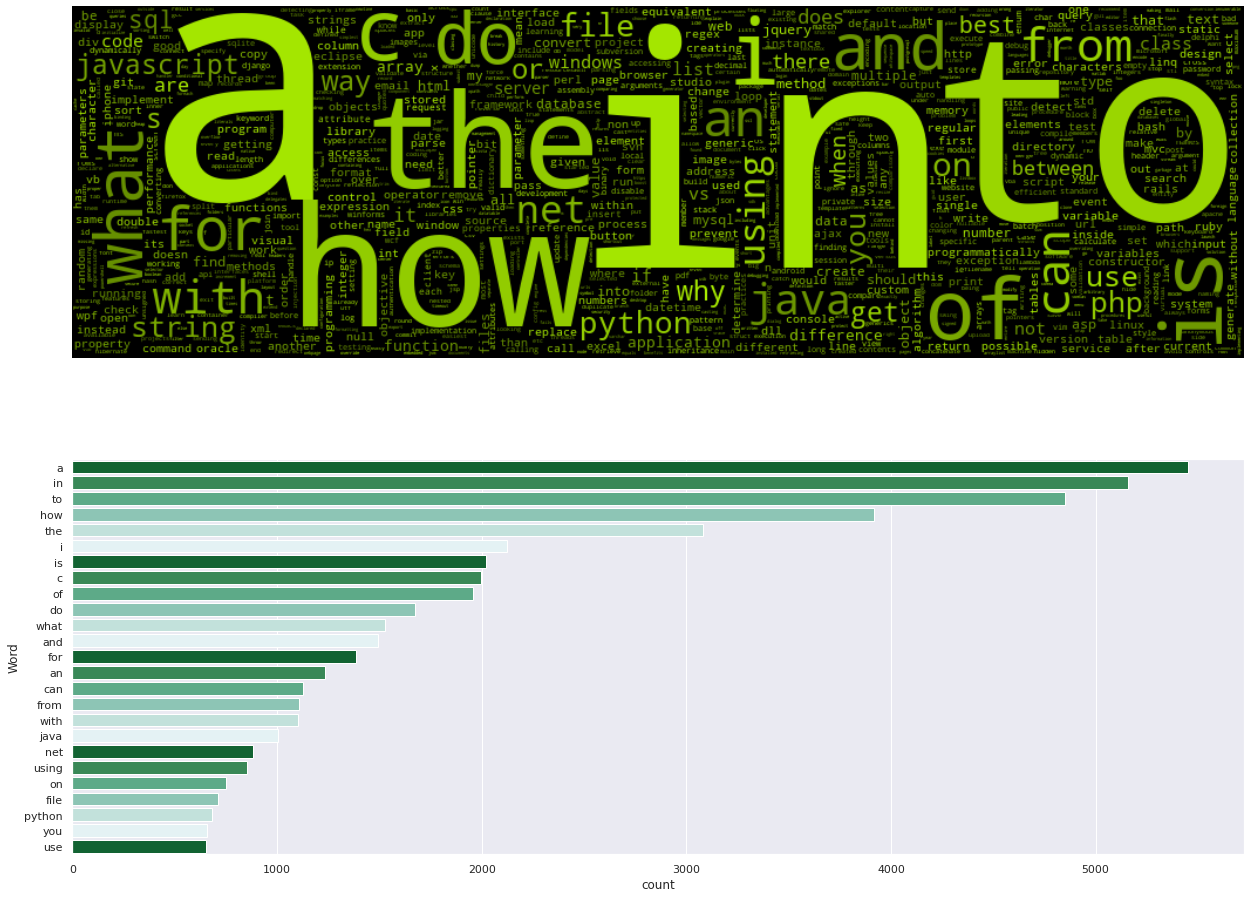

In [ ]:
freq_words(data_raw['clean_title'], 25)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# stopwords-to compare text data with and without stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
  
data_raw['clean_title'] = data_raw['clean_title'].apply(lambda x: remove_stopwords(x))

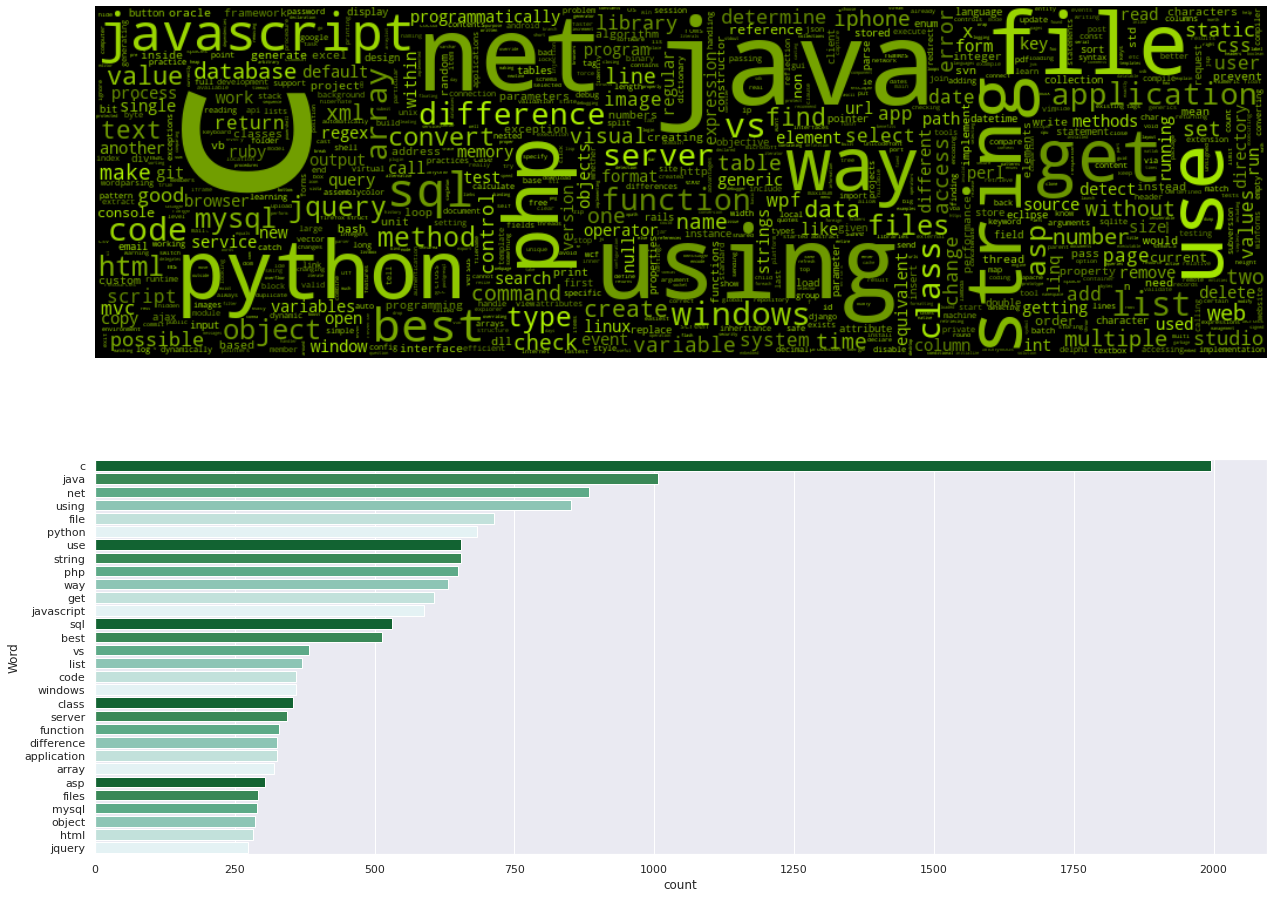

In [ ]:
freq_words(data_raw['clean_title'], 30)

In [ ]:
# get all genre tags in a list
all_tags = sum(data_raw['tags'],[])
len(set(all_tags))

4565

In [ ]:
all_tags = nltk.FreqDist(all_tags)
all_tags_df = pd.DataFrame({'Tag': list(all_tags.keys()), 'Count': list(all_tags.values())})


In [ ]:
sorted_tags = all_tags_df.sort_values(by='Count', ascending=False)
sorted_tags.head(40)

,Tag,Count
0,c#,2678
49,java,1609
9,.net,1583
85,c++,1175
14,javascript,1076
102,python,1016
28,php,885
175,c,591
24,sql,544
5,html,493


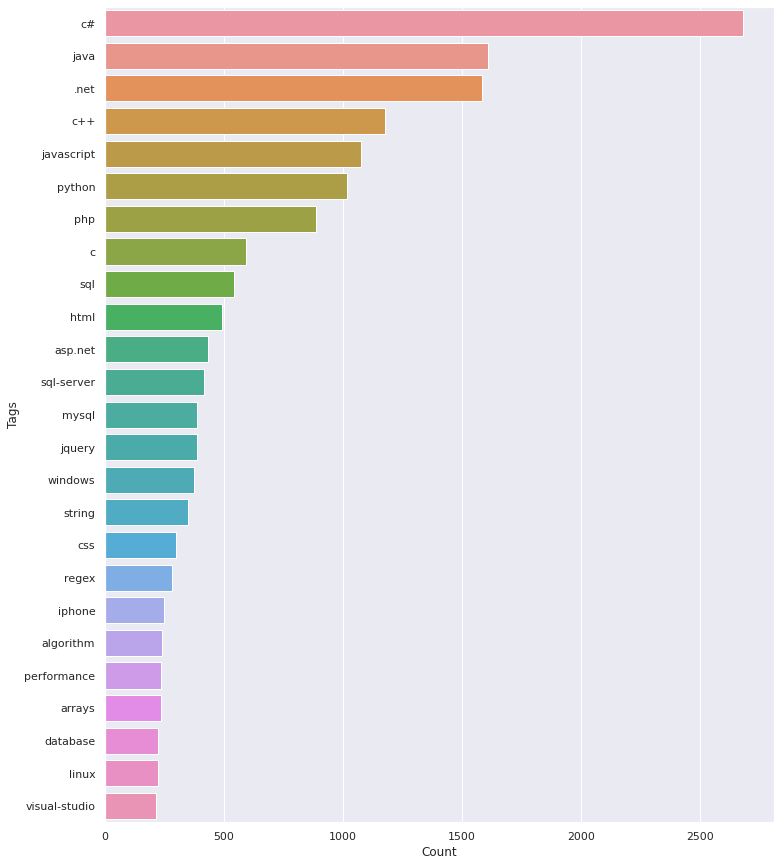

In [ ]:

g = all_tags_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Tag")
ax.set(ylabel = 'Tags')
plt.show()

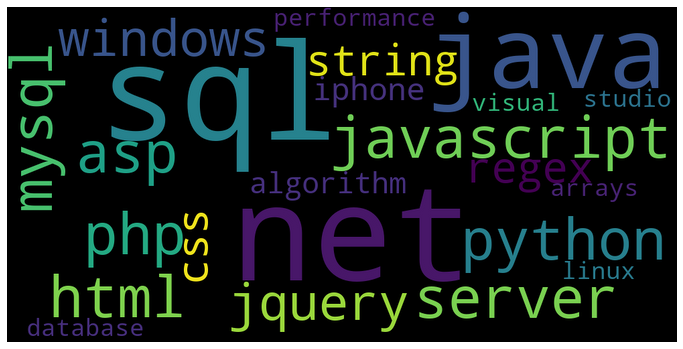

In [ ]:
text = " ".join(review for review in g.Tag)
wordcloud = WordCloud(width=1000, height=500,max_font_size=200).generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.show()

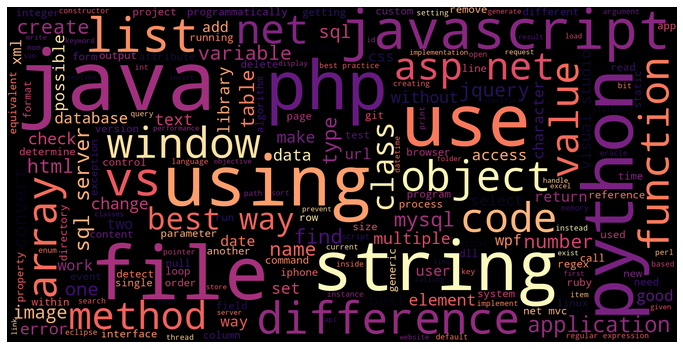

In [ ]:
text = " ".join(review for review in data_raw.clean_title)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [ ]:
#Text Mining Algorithms

In [ ]:
# Lemmatization process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
lemmatization process. 
'''
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lem

In [ ]:
# Defining a Count Vectorizer object
count_vec = CountVectorizer(stop_words='english', max_features=10000)
# Defining a TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), tokenizer=tokenize_and_lemmatize, max_features=10000, use_idf=True)

In [ ]:
data_raw.columns

Index(['tags', 'title', 'clean_title'], dtype='object')

In [ ]:
mb = MultiLabelBinarizer()
mb.fit(data_raw['tags'])

y = mb.transform(data_raw['tags'])

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_raw['clean_title'], y, test_size=0.20, random_state=42)

In [ ]:
# Tf-Idf transformation 
xtrain_tfidf = tfidf_vec.fit_transform(X_train)
xtest_tfidf = tfidf_vec.transform(X_test)
xtrain_tfidf.shape

(12000, 10000)

In [ ]:
# Count Vectorizer transformation
xtrain_cv = count_vec.fit_transform(X_train)
xtest_cv = count_vec.transform(X_test)

In [ ]:
xtrain_cv.shape


(12000, 6370)

In [ ]:
evaluation_list=[]


In [ ]:
#Logistic Regression
log_reg = LogisticRegression()
oneVsRest = OneVsRestClassifier(log_reg)
oneVsRest.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
y_pred = oneVsRest.predict(xtest_tfidf)

def get_performance(y_test, y_pred):
    # Evaluate Performance
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    return accuracy, precision, recall, f1score

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 4.33
Precision : 0.8515068493150685
Recall    : 0.17611060743427018
F1-score   : 0.29185839045919804


In [ ]:
import timeit

In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = oneVsRest.predict(text_vec)
    return mb.inverse_transform(y_pred)

start = timeit.default_timer()
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")
stop = timeit.default_timer()
times= stop - start
times=times/20
print('Time: ',times)




Title:  Should I look at version control systems beyond Subversion? 
Predicted tag:  [('svn', 'version-control')]
Actual tag:  ['svn', 'git', 'version-control', 'mercurial', 'bazaar'] 

Title:  Likelihood of collision using most significant bits of a UUID in Java 
Predicted tag:  [('java',)]
Actual tag:  ['java', 'uuid'] 

Title:  C# Telnet Library 
Predicted tag:  [('c', 'c#', 'c++')]
Actual tag:  ['c#', '.net', 'telnet'] 

Title:  Convert bitmaps to one multipage TIFF image in .NET 2.0 
Predicted tag:  [('.net', 'c#')]
Actual tag:  ['c#', '.net', '.net-2.0', 'drawing', 'tiff'] 

Title:  Invalid Characters in XML 
Predicted tag:  [('xml',)]
Actual tag:  ['xml', 'illegal-characters'] 

Title:  How to order events bound with jQuery 
Predicted tag:  [('javascript', 'jquery')]
Actual tag:  ['javascript', 'jquery', 'events'] 

Title:  HTTP vs HTTPS performance 
Predicted tag:  [('http',)]
Actual tag:  ['performance', 'http', 'https'] 

Title:  Accessing C# Anonymous Type Objects 
Predicted

In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Logistic Regression'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),    ('time',round(times,3))

     ]))

In [ ]:
#Multinomial Naive Bayes
nbayes = MultinomialNB()
oneVsRest_nb = OneVsRestClassifier(nbayes)
oneVsRest_nb.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)

In [ ]:
y_pred = oneVsRest_nb.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 4.0
Precision : 0.9085714285714286
Recall    : 0.01801903898458749
F1-score   : 0.035337259695521726


In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = oneVsRest_nb.predict(text_vec)
    return mb.inverse_transform(y_pred)

start = timeit.default_timer()
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")
stop = timeit.default_timer()
times= stop - start
times=times/20
print('Time: ',times)

Title:  What is the difference between IQueryable<T> and IEnumerable<T>? 
Predicted tag:  [('c#',)]
Actual tag:  ['.net', 'linq', '.net-3.5', 'ienumerable', 'iqueryable'] 

Title:  Producing executable jar in NetBeans 
Predicted tag:  [('java',)]
Actual tag:  ['java', 'netbeans', 'jar', 'executable', 'manifest'] 

Time:  1.0872264051000002


In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Multinomial Naive Bayes'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),     ('time',round(times,3))

     ]))

In [ ]:
#Linear SVC
linear_svc = LinearSVC()
oneVsRest_svc = OneVsRestClassifier(linear_svc)
oneVsRest_svc.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [ ]:
y_pred = oneVsRest_svc.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 87.57000000000001
Precision : 0.7445237509229633
Recall    : 0.34281504986400724
F1-score   : 0.4694653526809964


In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = oneVsRest_svc.predict(text_vec)
    return mb.inverse_transform(y_pred)

start = timeit.default_timer()
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")
stop = timeit.default_timer()
times= stop - start
times=times/20
print('Time: ',times)

Title:  Hex operations in C# 
Predicted tag:  [('c#', 'c++', 'hex')]
Actual tag:  ['c#', 'hex'] 

Title:  What is the difference between require and include with php? 
Predicted tag:  [('include', 'php')]
Actual tag:  ['php', 'include'] 

Title:  __construct() vs SameAsClassName() for constructor in PHP 
Predicted tag:  [('constructor', 'php')]
Actual tag:  ['php', 'constructor'] 

Title:  Is it possible to use C++ binaries from php 
Predicted tag:  [('php',)]
Actual tag:  ['php'] 

Title:  Is it acceptable not to deallocate memory 
Predicted tag:  [('.net', 'memory')]
Actual tag:  ['c++', 'c', 'oop', 'memory-management', 'memory-leaks'] 

Title:  If app.config for a DLL should be in the "main config"… what do we do with WCF References in DLLs? 
Predicted tag:  [('.net', 'app-config', 'wcf')]
Actual tag:  ['visual-studio-2008', 'wcf', '.net-3.5', 'app-config'] 

Title:  C++ performance of accessing member variables versus local variables 
Predicted tag:  [('c#', 'c++', 'performance')]


In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Linear Support vector classifier'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),     ('time',round(times,3))

     ]))

In [ ]:
#Random Forest
rforest = RandomForestClassifier(n_estimators=100)
oneVsRest_rf = OneVsRestClassifier(rforest)
oneVsRest_rf.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                            

In [ ]:
y_pred = oneVsRest_rf.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 6.57
Precision : 0.8238362760834671
Recall    : 0.23266092475067995
F1-score   : 0.3628490632732414


In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'RandomForestClassifier'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),
    ('time',round(times,3))
     ]))

In [ ]:
evaluation_list=new_evaluation_list

In [ ]:
results = pd.DataFrame(data=evaluation_list)
results = results[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1','time']]
results = results.sort_values(by='Test Accuracy', ascending=False)
results = results.set_index('Model')
results

In [ ]:
results

,Test Accuracy,Precision,Recall,F1,time
Model,,,,,
Linear Support vector classifier,87.57,0.74,0.34,0.47,0.811
RandomForestClassifier,6.57,0.82,0.23,0.36,0.811
Logistic Regression,4.33,0.85,0.18,0.29,0.687
Multinomial Naive Bayes,4.00,0.91,0.02,0.04,1.087


In [ ]:
#optimization Grid-Search
param = {'estimator__penalty':['l1', 'l2'], 'estimator__C':[0.001, 0.01, 1, 10]}

In [ ]:
oneVsRest.get_params().keys()


dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

In [ ]:
# GridSearchCV
kf=KFold(n_splits=10, shuffle=True, random_state=55)
lr_grid = GridSearchCV(oneVsRest, param_grid = param, cv = kf, scoring='f1_micro', n_jobs=-1)
lr_grid.fit(xtrain_tfidf, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=55, shuffle=True),
             error_score=nan,
             estimator=OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                            

In [ ]:
# examine the best model
print(lr_grid.best_score_)
print(lr_grid.best_params_)
print(lr_grid.best_estimator_)

0.34830243805070094
{'estimator__C': 10, 'estimator__penalty': 'l2'}
OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)


In [ ]:
# Optimized Logistic Regression Model
log_reg = LogisticRegression(C=10, penalty='l2')
ovr = OneVsRestClassifier(log_reg)
ovr.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:

# performance metrics of the optimized model
y_pred = ovr.predict(xtest_tfidf)

accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 66.5
Precision : 0.7664613927048792
Recall    : 0.26989157631359467
F1-score   : 0.39921046138662725
